In [6]:
# <!---
# This program outputs the number of data packets transferred on a monthly basis through all the hotspots in a selected perimeter during the last year
# -->

import pandas as pd
import time
from datetime import date, timedelta
import requests
import json
import numpy as np
from matplotlib import pyplot as plt

dict1 = {}
dict2 = {}


#scen = "norfolkVA"
#lat = "36.848446" 
#lon = "-76.287268"

# scen = "miamiFL"
# lat = "25.856630"
# lon = "-80.278249"

# Seattle, WA: 47.604872,-122.333622
scen = "seattleWA"
lat = "47.604872"
lon = "-122.333622"

#Denver, CO: 39.743418,-104.992285
#scen = "denverCO"
#lat = "39.743418"
#lon = "-104.992285"

#Topeka, KS: 39.033278,-95.681458
#scen = "topekaKS"
#lat = "39.033278"
#lon = "-95.681458"

#Rome, GA: 34.258591,-85.176021
#scen = "romeGA"
#lat = "34.258591"
#lon = "-85.176021"

#Turlock, CA: 37.506028,-120.848877
# scen = "turlockCA"
# lat = "37.506028"
# lon = "-120.848877"


url = "https://api.helium.io/v1/hotspots/location/distance/?lat="+lat+"&lon="+lon+"&distance=32187"
dict1 = json.loads(requests.get(url).text)
dict2 = dict1

while "cursor" in dict1:
    cursor = dict1['cursor']
    url = "https://api.helium.io/v1/hotspots/location/distance/?lat="+lat+"&lon="+lon+"&distance=32187"
    url = url + "&cursor=" + cursor
    dict1 = json.loads(requests.get(url).text)
    dict2.update(dict1)
    time.sleep(1)
url = ''

minTime = []
maxTime = []
current_date = date.today()

hotspot_names = []
for num in range(len(dict2['data'])):
    hotspot_names.append(dict2['data'][num]['name'])
    
for i in range(1,13):
    maxTime.append(current_date)
    priorDate = current_date-timedelta(days=30)
    minTime.append(priorDate)
    current_date = priorDate    


dataPerAddress = {}
for i in range(len(dict2['data'])):
    dataPerAddress[dict2['data'][i]['address']] = []
print(dataPerAddress.keys())
print(len(dataPerAddress))

dict = {}
sum1 = 0
cursor = ''
for a in dataPerAddress:
    print("Current address: ", a)
    for t in range(len(minTime)):            
        url = "https://api.helium.io/v1/hotspots/"+a+"/activity/?filter_types=state_channel_close_v1&min_time="+str(minTime[t])+"T00:00:01Z&max_time="+str(maxTime[t])+"T23:59:59Z"
        dict = json.loads(requests.get(url).text)
        time.sleep(1)
        while "cursor" in dict:
            for i in range(len(dict['data'])):            
                sum1 = sum1 + dict['data'][i]['state_channel']['summaries'][0]['num_packets']
            cursor = dict['cursor']
            url = "https://api.helium.io/v1/hotspots/"+a+"/activity/?filter_types=state_channel_close_v1&min_time="+str(minTime[t])+"T00:00:01Z&max_time="+str(maxTime[t])+"T23:59:59Z"
            url = url + "&cursor=" + cursor
            dict = json.loads(requests.get(url).text)
            time.sleep(1)
        else:
            try:
                for i in range(len(dict['data'])):            
                    sum1 = sum1 + dict['data'][i]['state_channel']['summaries'][0]['num_packets']
            except:
                print("error no data key for ", a)

        dataPerAddress[a].append(sum1)
        sum1 = 0
    dataPerAddress[a].reverse()
    print(dataPerAddress[a])
    
#     plt.plot(dataPerAddress[a])
#     plt.plot(np.cumsum((dataPerAddress)[a]))
#     plt.show()
#     plt.bar(range(9), dataPerAddress[a])
#     plt.show()

# for a in range(0, len(dataPerAddress)):
   
#     plt.plot(list(dataPerAddress.values())[a])
#     if ((a+1) % 3 == 0) or (a == len(dataPerAddress)-1):
#         plt.xlabel("Weeks")
#         plt.ylabel("Rewards [HNT]")
#         plt.title("Data Packets Transferred: ")
#         plt.show()

# for a in range(0, len(dataPerAddress)):
   
#     plt.plot(np.cumsum(list(dataPerAddress.values())[a]))
#     if ((a+1) % 3 == 0) or (a == len(dataPerAddress)-1):
#         plt.xlabel("Weeks")
#         plt.ylabel("Rewards [HNT]")
#         plt.title("Cumulative Data Packets Transferred: ")
#         plt.show()
        
dict.clear()
sum1=0
cursor=''



dict_keys(['11j5BJZMaa7vBe29bNqxMn1hX9vMfs4425EjgvmnWX3QwFEtR2C', '112k1bZYuexYQvr3kd8rpaEfvYfvFeXCxjzbTx9iEm3ekAxokWWT', '112prrpc3sJipqr2pdYwLXi3MrDqPsZCHJEbGGeSgMiymp6iFaAe', '11rY8xVuhXzK5yaJ4hmea2qREt3uGFxyPmqz14RXTjNkSzzR6tx', '112Trn6C22qiK732RKWdmQsuWPoZzaehZtmEUYnETUDa667CmFQs', '112GFd9Y9Hgn227nETKhGTbghKYxxHsfAmtfCBULG3YbLGpnECcw', '112DgBPYfZf31EYdTguPD2VLyfw8b25JeuNUfX1eAVa72J18DDLn', '11bXMx89tUNLjgHM5T8xHdRAoaC8qfwQrJkW9GeSvmbgGq7SmHN', '11vCB6BNeiHkjCHBWFXuXNJid757g7Ufds6qc7kSTpkKpNuBAcs', '112pcGse74rHMUboA8q345Rr3gbdGJtdphBctfnePMQXt1cxpFff', '119kTFFxbUj4PFY5HpXjBnVB245DJBhD7uAZsKyfreFnTD1jXhv', '112H4F3QTTcHEejypSEPypLxUtxtBA9rDxGJnZzPzmjbbLNji3pL', '11xzD6yrWF2e3oZcLLD6GhjZS7seFoDrG85xqHGxAUUgy4SZCRb', '112cNybn4FsRPxYp4YF9nAL1hEMQQ3RX1QLRwfgB6vn9UHwU5hKJ', '11quu9aMtFQQxbvjZwPfEvdtYpPELZM82n5udp61mtt99jxRXQH', '11ACvytKrtyjJeQdX5JMJDyi4Xf3aP2UNLr2JZZyCpJN8QpwxWo', '11uFopaRh2zXxiFd4nkLboZKSFXQkQJxYjX8UBrxCpVPFmkx7JX', '115U1QS6256cwfGc6NuWC1XPscvhr6ttsSCqiiet5LJtk

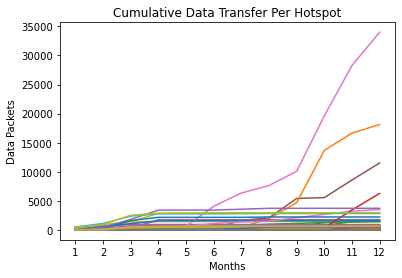

{'11j5BJZMaa7vBe29bNqxMn1hX9vMfs4425EjgvmnWX3QwFEtR2C': [0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 3], '112k1bZYuexYQvr3kd8rpaEfvYfvFeXCxjzbTx9iEm3ekAxokWWT': [0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0], '112prrpc3sJipqr2pdYwLXi3MrDqPsZCHJEbGGeSgMiymp6iFaAe': [0, 0, 143, 5, 0, 2, 0, 0, 0, 0, 0, 0], '11rY8xVuhXzK5yaJ4hmea2qREt3uGFxyPmqz14RXTjNkSzzR6tx': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], '112Trn6C22qiK732RKWdmQsuWPoZzaehZtmEUYnETUDa667CmFQs': [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0], '112GFd9Y9Hgn227nETKhGTbghKYxxHsfAmtfCBULG3YbLGpnECcw': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '112DgBPYfZf31EYdTguPD2VLyfw8b25JeuNUfX1eAVa72J18DDLn': [509, 174, 572, 185, 1, 8, 1, 0, 1, 0, 7, 7], '11bXMx89tUNLjgHM5T8xHdRAoaC8qfwQrJkW9GeSvmbgGq7SmHN': [0, 0, 0, 2, 1, 89, 9, 91, 86, 97, 123, 87], '11vCB6BNeiHkjCHBWFXuXNJid757g7Ufds6qc7kSTpkKpNuBAcs': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '112pcGse74rHMUboA8q345Rr3gbdGJtdphBctfnePMQXt1cxpFff': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], '119kTFFxbUj4PFY5HpXjBnVB245DJBhD7uAZsKyfreFnT

In [11]:
import pickle
import numpy as np

with open(scen+"_dataTransfer_20mile.pkl", 'wb') as fh:
    pickle.dump(dataPerAddress, fh)

file = open("seattleWA_dataTransfer_20mile.pkl", 'rb')
loadedDPA = pickle.load(file)
len(loadedDPA)
from matplotlib import pyplot as plt
for a in range(len(loadedDPA)):    
    plt.plot(np.cumsum(list(loadedDPA.values())[a]))
    #if ((a+1) % 3 == 0) or (a == len(dataPerAddress)-1):

plt.xticks(ticks = list(range(0,12)), labels = list(range(1,13)))
plt.xlabel("Months")
plt.ylabel("Data Packets")
plt.title("Cumulative Data Transfer Per Hotspot")
#plt.legend()
plt.show()
print(loadedDPA)